## Базовый пример

In [ ]:
import tensorflow as tf
import tensorflow.keras as keras

In [ ]:
import numpy as np
from sklearn.datasets import load_iris

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
X, y = load_iris(return_X_y=True)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
X_train.shape

(120, 4)

In [ ]:
y_train.shape

(120,)

## Способ 1 задать модель - старый

In [ ]:
model = keras.models.Sequential([
    keras.layers.Dense(32, activation='relu', input_shape=(4,)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(3),
    keras.layers.Softmax()
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
r = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50)

Epoch 1/50
4/4 [==============================] - 0s 22ms/step - loss: 0.1134 - accuracy: 0.9667 - val_loss: 0.1020 - val_accuracy: 0.9667
Epoch 2/50
4/4 [==============================] - 0s 10ms/step - loss: 0.1078 - accuracy: 0.9667 - val_loss: 0.0960 - val_accuracy: 0.9667
Epoch 3/50
4/4 [==============================] - 0s 10ms/step - loss: 0.1057 - accuracy: 0.9667 - val_loss: 0.0907 - val_accuracy: 0.9667
Epoch 4/50
4/4 [==============================] - 0s 11ms/step - loss: 0.1027 - accuracy: 0.9667 - val_loss: 0.0882 - val_accuracy: 0.9667
Epoch 5/50
4/4 [==============================] - 0s 11ms/step - loss: 0.1003 - accuracy: 0.9667 - val_loss: 0.0868 - val_accuracy: 0.9667
Epoch 6/50
4/4 [==============================] - 0s 11ms/step - loss: 0.0955 - accuracy: 0.9667 - val_loss: 0.0885 - val_accuracy: 0.9667
Epoch 7/50
4/4 [==============================] - 0s 10ms/step - loss: 0.0937 - accuracy: 0.9833 - val_loss: 0.0897 - val_accuracy: 0.9667
Epoch 8/50
4/4 [===========

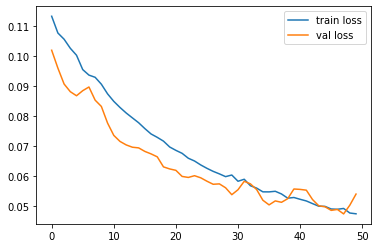

In [ ]:
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()

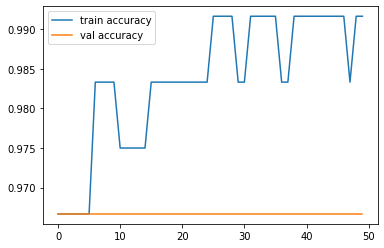

In [ ]:
plt.plot(r.history['accuracy'], label='train accuracy')
plt.plot(r.history['val_accuracy'], label='val accuracy')
plt.legend()
plt.show()

## Способ 2 задать модель - functional api

In [ ]:
i = keras.layers.Input(shape=(4,))
o = keras.layers.Dense(16, activation='relu')(i)
o = keras.layers.Dense(32, activation='relu')(o)
o = keras.layers.Dense(3)(o)
o = keras.layers.Softmax()(o)

In [ ]:
model = keras.Model(inputs=i, outputs=o)

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 4)]               0         
_________________________________________________________________
dense_6 (Dense)              (None, 16)                80        
_________________________________________________________________
dense_7 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_8 (Dense)              (None, 3)                 99        
_________________________________________________________________
softmax_2 (Softmax)          (None, 3)                 0         
Total params: 723
Trainable params: 723
Non-trainable params: 0
_________________________________________________________________


In [ ]:
r = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50)

Epoch 1/50
4/4 [==============================] - 0s 47ms/step - loss: 1.0386 - accuracy: 0.3825 - val_loss: 0.9549 - val_accuracy: 0.5000
Epoch 2/50
4/4 [==============================] - 0s 11ms/step - loss: 1.0000 - accuracy: 0.4056 - val_loss: 0.9183 - val_accuracy: 0.6000
Epoch 3/50
4/4 [==============================] - 0s 12ms/step - loss: 0.9393 - accuracy: 0.6104 - val_loss: 0.8844 - val_accuracy: 0.7333
Epoch 4/50
4/4 [==============================] - 0s 10ms/step - loss: 0.8999 - accuracy: 0.7613 - val_loss: 0.8504 - val_accuracy: 0.7000
Epoch 5/50
4/4 [==============================] - 0s 10ms/step - loss: 0.8588 - accuracy: 0.8142 - val_loss: 0.8177 - val_accuracy: 0.7333
Epoch 6/50
4/4 [==============================] - 0s 11ms/step - loss: 0.8145 - accuracy: 0.8121 - val_loss: 0.7857 - val_accuracy: 0.7667
Epoch 7/50
4/4 [==============================] - 0s 11ms/step - loss: 0.7670 - accuracy: 0.8202 - val_loss: 0.7548 - val_accuracy: 0.7667
Epoch 8/50
4/4 [===========

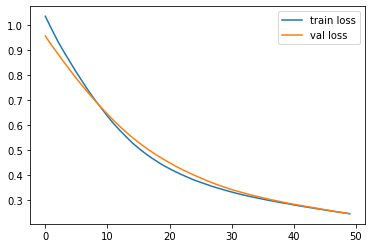

In [ ]:
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()

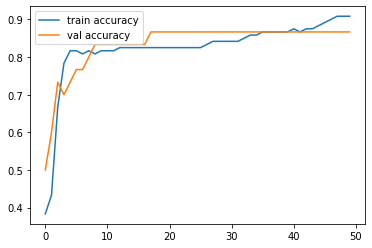

In [ ]:
plt.plot(r.history['accuracy'], label='train accuracy')
plt.plot(r.history['val_accuracy'], label='val accuracy')
plt.legend()
plt.show()

## Работа с картинками

In [ ]:
!wget -O catsdogs.zip "https://drive.google.com/uc?export=download&id=15p_fYM7CscmaLFAE2C0zvGvXpWk1wV6h"

--2021-02-25 16:42:24--  https://drive.google.com/uc?export=download&id=15p_fYM7CscmaLFAE2C0zvGvXpWk1wV6h
Resolving drive.google.com (drive.google.com)... 172.217.164.142, 2607:f8b0:4004:814::200e
Connecting to drive.google.com (drive.google.com)|172.217.164.142|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-14-8o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/i2m7pmg6d9elbuj2sq2mn61eadm400eu/1614271275000/13824739836143424630/*/15p_fYM7CscmaLFAE2C0zvGvXpWk1wV6h?e=download [following]
--2021-02-25 16:42:29--  https://doc-14-8o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/i2m7pmg6d9elbuj2sq2mn61eadm400eu/1614271275000/13824739836143424630/*/15p_fYM7CscmaLFAE2C0zvGvXpWk1wV6h?e=download
Resolving doc-14-8o-docs.googleusercontent.com (doc-14-8o-docs.googleusercontent.com)... 142.250.73.193, 2607:f8b0:4004:829::2001
Connecting to doc-14-8o-docs.googleusercontent.com (doc-14-8o-doc

In [ ]:
!unzip catsdogs.zip

Archive:  catsdogs.zip
   creating: catsdogs/
  inflating: catsdogs/.DS_Store      
  inflating: __MACOSX/catsdogs/._.DS_Store  
   creating: catsdogs/test/
   creating: catsdogs/train/
   creating: catsdogs/test/dogs/
   creating: catsdogs/test/cats/
  inflating: catsdogs/test/.DS_Store  
  inflating: __MACOSX/catsdogs/test/._.DS_Store  
   creating: catsdogs/train/dogs/
   creating: catsdogs/train/cats/
  inflating: catsdogs/train/.DS_Store  
  inflating: __MACOSX/catsdogs/train/._.DS_Store  
  inflating: catsdogs/test/dogs/dog.4159.jpg  
  inflating: __MACOSX/catsdogs/test/dogs/._dog.4159.jpg  
  inflating: catsdogs/test/dogs/dog.416.jpg  
  inflating: __MACOSX/catsdogs/test/dogs/._dog.416.jpg  
  inflating: catsdogs/test/dogs/dog.4158.jpg  
  inflating: __MACOSX/catsdogs/test/dogs/._dog.4158.jpg  
  inflating: catsdogs/test/dogs/dog.414.jpg  
  inflating: __MACOSX/catsdogs/test/dogs/._dog.414.jpg  
  inflating: catsdogs/test/dogs/dog.415.jpg  
  inflating: __MACOSX/catsdogs/test/do

In [ ]:
!ls catsdogs/train

cats  dogs


In [ ]:
train_generator = keras.preprocessing.image.ImageDataGenerator(rescale=1./255.)
test_generator = keras.preprocessing.image.ImageDataGenerator(rescale=1./255.)

In [ ]:
train = train_generator.flow_from_directory('catsdogs/train', target_size=(224, 224), batch_size=32, class_mode='binary')
test = test_generator.flow_from_directory('catsdogs/test', target_size=(224, 224), batch_size=32, class_mode='binary')

Found 500 images belonging to 2 classes.
Found 200 images belonging to 2 classes.


In [ ]:
i = keras.layers.Input(shape=(224,224,3))
o = keras.layers.Conv2D(16, (5,5), strides=(3,3))(i)
o = keras.layers.MaxPool2D((2,2))(o)
o = keras.layers.ReLU()(o)
o = keras.layers.Conv2D(32, (3,3))(o)
o = keras.layers.MaxPool2D((2,2))(o)
o = keras.layers.ReLU()(o)
o = keras.layers.Conv2D(64, (3,3), strides=(1,1))(o)
o = keras.layers.MaxPool2D((2,2))(o)
o = keras.layers.ReLU()(o)
o = keras.layers.Flatten()(o)
o = keras.layers.Dense(1, activation='sigmoid')(o)

In [ ]:
model = keras.Model(inputs=i, outputs=o)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 74, 74, 16)        1216      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 37, 37, 16)        0         
_________________________________________________________________
re_lu (ReLU)                 (None, 37, 37, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 35, 35, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 17, 17, 32)        0         
_________________________________________________________________
re_lu_1 (ReLU)               (None, 17, 17, 32)        0   

In [ ]:
model.fit(train, epochs=10, validation_data=test)

Epoch 1/10
16/16 [==============================] - 8s 158ms/step - loss: 0.6955 - accuracy: 0.4994 - val_loss: 0.6904 - val_accuracy: 0.5100
Epoch 2/10
16/16 [==============================] - 2s 136ms/step - loss: 0.6871 - accuracy: 0.5368 - val_loss: 0.6853 - val_accuracy: 0.5450
Epoch 3/10
16/16 [==============================] - 2s 135ms/step - loss: 0.6757 - accuracy: 0.5732 - val_loss: 0.6805 - val_accuracy: 0.5850
Epoch 4/10
16/16 [==============================] - 2s 133ms/step - loss: 0.6487 - accuracy: 0.6201 - val_loss: 0.6840 - val_accuracy: 0.5800
Epoch 5/10
16/16 [==============================] - 2s 135ms/step - loss: 0.6103 - accuracy: 0.6676 - val_loss: 0.6564 - val_accuracy: 0.6200
Epoch 6/10
16/16 [==============================] - 2s 135ms/step - loss: 0.5754 - accuracy: 0.6953 - val_loss: 0.6510 - val_accuracy: 0.6600
Epoch 7/10
16/16 [==============================] - 2s 138ms/step - loss: 0.5408 - accuracy: 0.7226 - val_loss: 0.6839 - val_accuracy: 0.6100
Epoch 

## Добавим Batch Normalization

In [ ]:
i = keras.layers.Input(shape=(224,224,3))
o = keras.layers.BatchNormalization()(i)
o = keras.layers.Conv2D(16, (5,5), strides=(3,3))(o)
o = keras.layers.MaxPool2D((2,2))(o)
o = keras.layers.ReLU()(o)
o = keras.layers.BatchNormalization()(o)
o = keras.layers.Conv2D(32, (3,3))(o)
o = keras.layers.MaxPool2D((2,2))(o)
o = keras.layers.ReLU()(o)
o = keras.layers.BatchNormalization()(o)
o = keras.layers.Conv2D(64, (3,3), strides=(1,1))(o)
o = keras.layers.MaxPool2D((2,2))(o)
o = keras.layers.ReLU()(o)
o = keras.layers.BatchNormalization()(o)
o = keras.layers.Flatten()(o)
o = keras.layers.Dense(1, activation='sigmoid')(o)

In [ ]:
model = keras.Model(inputs=i, outputs=o)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
batch_normalization (BatchNo (None, 224, 224, 3)       12        
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 74, 74, 16)        1216      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 37, 37, 16)        0         
_________________________________________________________________
re_lu_3 (ReLU)               (None, 37, 37, 16)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 37, 37, 16)        64        
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 35, 35, 32)        4640

In [ ]:
model.fit(train, epochs=10, validation_data=test)

Epoch 1/10
16/16 [==============================] - 3s 153ms/step - loss: 0.9089 - accuracy: 0.5358 - val_loss: 0.6863 - val_accuracy: 0.5300
Epoch 2/10
16/16 [==============================] - 2s 136ms/step - loss: 0.4525 - accuracy: 0.7970 - val_loss: 0.7139 - val_accuracy: 0.5000
Epoch 3/10
16/16 [==============================] - 2s 138ms/step - loss: 0.2935 - accuracy: 0.8918 - val_loss: 0.7256 - val_accuracy: 0.5000
Epoch 4/10
16/16 [==============================] - 2s 138ms/step - loss: 0.1706 - accuracy: 0.9656 - val_loss: 0.7511 - val_accuracy: 0.5000
Epoch 5/10
16/16 [==============================] - 2s 138ms/step - loss: 0.1188 - accuracy: 0.9947 - val_loss: 0.8601 - val_accuracy: 0.5000
Epoch 6/10
16/16 [==============================] - 2s 136ms/step - loss: 0.0809 - accuracy: 0.9941 - val_loss: 0.9005 - val_accuracy: 0.5000
Epoch 7/10
16/16 [==============================] - 2s 137ms/step - loss: 0.0606 - accuracy: 0.9978 - val_loss: 0.9967 - val_accuracy: 0.5000
Epoch 

## Готовые архитектуры сети

In [ ]:
train_generator = keras.preprocessing.image.ImageDataGenerator()
test_generator = keras.preprocessing.image.ImageDataGenerator()
train = train_generator.flow_from_directory('catsdogs/train', target_size=(224, 224), batch_size=32, class_mode='binary')
test = test_generator.flow_from_directory('catsdogs/test', target_size=(224, 224), batch_size=32, class_mode='binary')

Found 500 images belonging to 2 classes.
Found 200 images belonging to 2 classes.


In [ ]:
vgg16 = keras.applications.vgg16.VGG16(include_top=False, weights=None)

In [ ]:
i = keras.layers.Input((224, 224, 3), dtype = tf.uint8)
o = tf.cast(i, tf.float32)
o = keras.applications.vgg16.preprocess_input(o)
o = vgg16(o)
o = keras.layers.Flatten()(o)
o = keras.layers.Dense(1, activation='sigmoid')(o)

In [ ]:
model = keras.Model(inputs=i, outputs=o)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
tf.cast (TFOpLambda)         (None, 224, 224, 3)       0         
_________________________________________________________________
tf.__operators__.getitem (Sl (None, 224, 224, 3)       0         
_________________________________________________________________
tf.nn.bias_add (TFOpLambda)  (None, 224, 224, 3)       0         
_________________________________________________________________
vgg16 (Functional)           (None, None, None, 512)   14714688  
_________________________________________________________________
flatten_2 (Flatten)          (None, 25088)             0         
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 2508

In [ ]:
vgg16.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, None, None, 3)]   0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128)   0     

In [ ]:
model.fit(train, epochs=10, validation_data=test)

Epoch 1/10
16/16 [==============================] - 14s 610ms/step - loss: 16.1662 - accuracy: 0.5350 - val_loss: 0.7886 - val_accuracy: 0.5000
Epoch 2/10
16/16 [==============================] - 7s 413ms/step - loss: 0.7020 - accuracy: 0.5692 - val_loss: 0.7000 - val_accuracy: 0.5050
Epoch 3/10
16/16 [==============================] - 7s 414ms/step - loss: 0.6959 - accuracy: 0.5175 - val_loss: 0.6980 - val_accuracy: 0.5000
Epoch 4/10
16/16 [==============================] - 7s 421ms/step - loss: 0.6907 - accuracy: 0.5282 - val_loss: 0.6933 - val_accuracy: 0.5000
Epoch 5/10
16/16 [==============================] - 7s 416ms/step - loss: 0.6923 - accuracy: 0.5268 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 6/10
16/16 [==============================] - 7s 417ms/step - loss: 0.6929 - accuracy: 0.5377 - val_loss: 0.6929 - val_accuracy: 0.5000
Epoch 7/10
16/16 [==============================] - 7s 420ms/step - loss: 0.6938 - accuracy: 0.4889 - val_loss: 0.6930 - val_accuracy: 0.5500
Epoc

## Предобученные архитектуры сети

In [ ]:
vgg16 = keras.applications.vgg16.VGG16(include_top=False, weights="imagenet")

In [ ]:
i = keras.layers.Input((224, 224, 3), dtype = tf.uint8)
o = tf.cast(i, tf.float32)
o = keras.applications.vgg16.preprocess_input(o)
o = vgg16(o)
o = keras.layers.Flatten()(o)
o = keras.layers.Dense(1, activation='sigmoid')(o)

In [ ]:
vgg16.trainable = False

In [ ]:
model = keras.Model(inputs=i, outputs=o)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_9 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
tf.cast_2 (TFOpLambda)       (None, 224, 224, 3)       0         
_________________________________________________________________
tf.__operators__.getitem_2 ( (None, 224, 224, 3)       0         
_________________________________________________________________
tf.nn.bias_add_2 (TFOpLambda (None, 224, 224, 3)       0         
_________________________________________________________________
vgg16 (Functional)           (None, None, None, 512)   14714688  
_________________________________________________________________
flatten_4 (Flatten)          (None, 25088)             0         
_________________________________________________________________
dense_13 (Dense)             (None, 1)                 2508

In [ ]:
model.fit(train, epochs=10, validation_data=test)

Epoch 1/10
16/16 [==============================] - 4s 203ms/step - loss: 4.2075 - accuracy: 0.7389 - val_loss: 1.4747 - val_accuracy: 0.9200
Epoch 2/10
16/16 [==============================] - 3s 185ms/step - loss: 0.7129 - accuracy: 0.9532 - val_loss: 1.2696 - val_accuracy: 0.9350
Epoch 3/10
16/16 [==============================] - 3s 187ms/step - loss: 0.0649 - accuracy: 0.9967 - val_loss: 0.7608 - val_accuracy: 0.9550
Epoch 4/10
16/16 [==============================] - 3s 186ms/step - loss: 0.0073 - accuracy: 0.9984 - val_loss: 0.8501 - val_accuracy: 0.9650
Epoch 5/10
16/16 [==============================] - 3s 191ms/step - loss: 1.6153e-06 - accuracy: 1.0000 - val_loss: 0.9240 - val_accuracy: 0.9600
Epoch 6/10
16/16 [==============================] - 3s 187ms/step - loss: 3.3222e-08 - accuracy: 1.0000 - val_loss: 0.9602 - val_accuracy: 0.9600
Epoch 7/10
16/16 [==============================] - 3s 187ms/step - loss: 9.6074e-08 - accuracy: 1.0000 - val_loss: 0.9684 - val_accuracy: 0